In [113]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

Contrast Enhancement

In [5]:
def contrast_enhancement(img, contrast_Factor=1.5):
    # Convert the img to floating representation
    float_img = img.astype(np.float32) / 255.0
    # make contrast modification
    enhanced_float_img = (float_img - 0.5) * contrast_Factor + 0.5
    # Normalize the values to the range of 0 and  1 
    enhanced_float_img = np.clip(enhanced_float_img, 0, 1)
    # return it to 8 bit representation
    final_enhanced_image = (enhanced_float_img * 255).astype(np.uint8)
    
    return final_enhanced_image # return the img in 8 bit representation 

In [106]:
# dataset
dataset = '/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Brad Pitt'

In [7]:
# Check if dataset exists
if not os.path.exists(dataset): #if not exist > exit but if exist continue the program
    print("Error !!\nDataset is not found ")
    exit()

# Get a list of images from the dataset 
image_files = [file for file in os.listdir(dataset) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# empty list to store images to enhance
images_to_enhance = []

# Check if the image files is empty
if len(image_files) == 0:
    print("There are no image files in the dataset.")
    exit()

In [109]:
# Generate 4 random samples from available images in image_files
images_by_random = random.sample(image_files, 4)

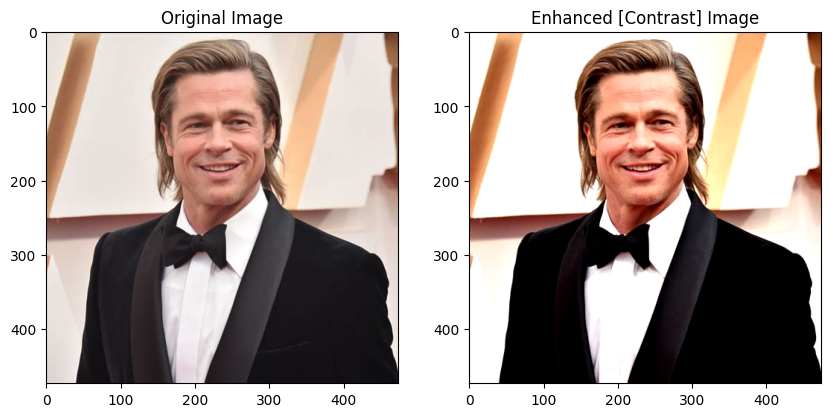

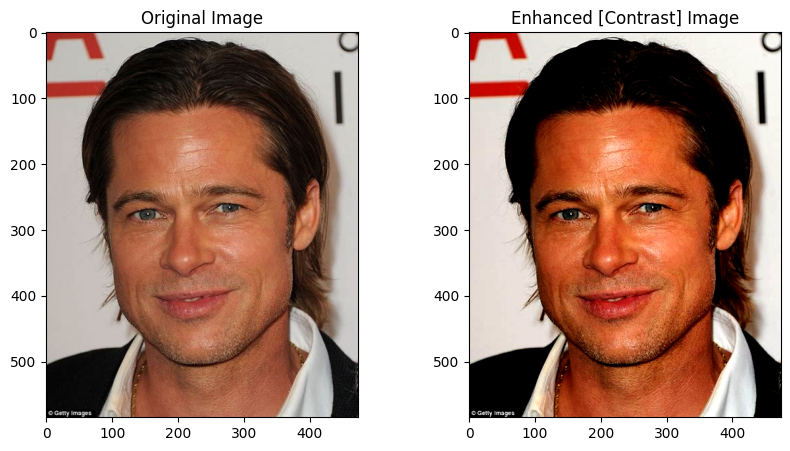

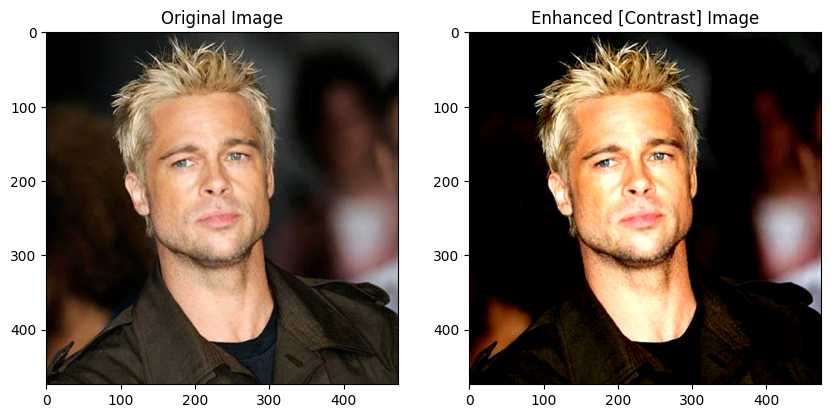

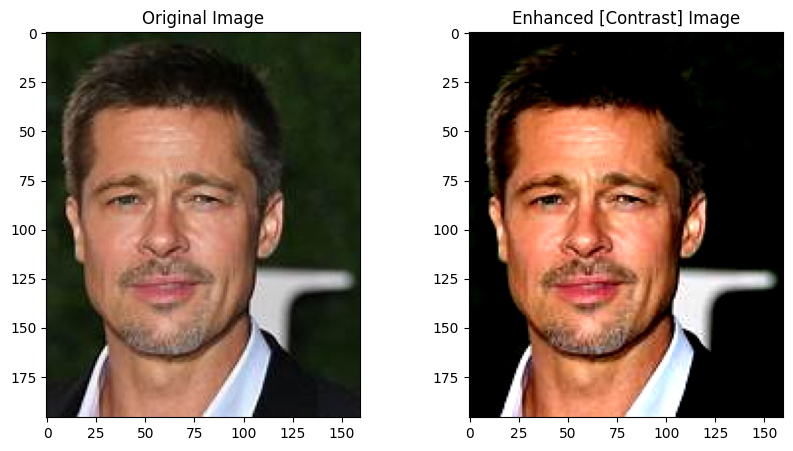

In [110]:
# Loop through the images that selected by random to enhance contrast and display Original and the enhanced image
for random_image in images_by_random:
    image_path = os.path.join(dataset, random_image)
    original_img = cv2.imread(image_path)

    if original_img is not None:
        # Apply contrast enhancement method on it
        enhanced_image_contrast = contrast_enhancement(original_img)
        
        #figure size for both Original and enhanced image 
        plt.figure(figsize=(10, 5))
        # Display the original images in a subplot
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        # Display the enhanced images in a subplot
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(enhanced_image_contrast, cv2.COLOR_BGR2RGB))
        plt.title('Enhanced [Contrast] Image')

        plt.show()
    else:
        print(f" cannot load the image : {image_path}")


Color Balance Adjustment

In [111]:
# Function to perform color balance adjustment
def adjust_color_balance(image):
    # Convert image to float32 for numerical precision
    img_float = image.astype(np.float32)
    # Split image into channels
    b, g, r = cv2.split(img_float)
    # Calculate average intensity for each channel
    avg_b = np.mean(b)
    avg_g = np.mean(g)
    avg_r = np.mean(r)
    # Calculate average grayscale intensity
    avg_gray = (avg_b + avg_g + avg_r) / 3.0
    # Scale each channel to balance color
    scale_b = avg_gray / avg_b
    scale_g = avg_gray / avg_g
    scale_r = avg_gray / avg_r
    # Multiply each channel by its scale factor
    balanced_b = cv2.multiply(b, scale_b)
    balanced_g = cv2.multiply(g, scale_g)
    balanced_r = cv2.multiply(r, scale_r)
    # Merge balanced channels
    balanced_image = cv2.merge([balanced_b, balanced_g, balanced_r])
    # Clip values to ensure they are within the valid range
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)
    return balanced_image

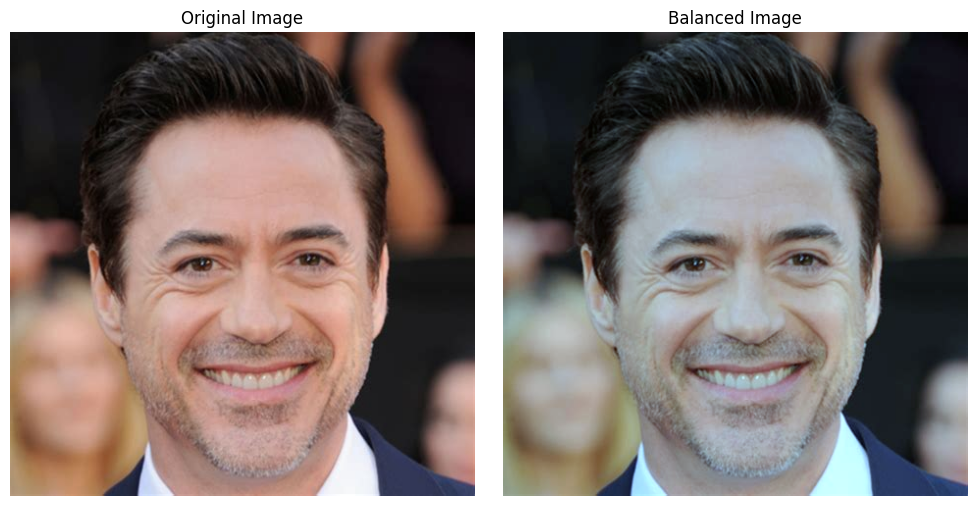

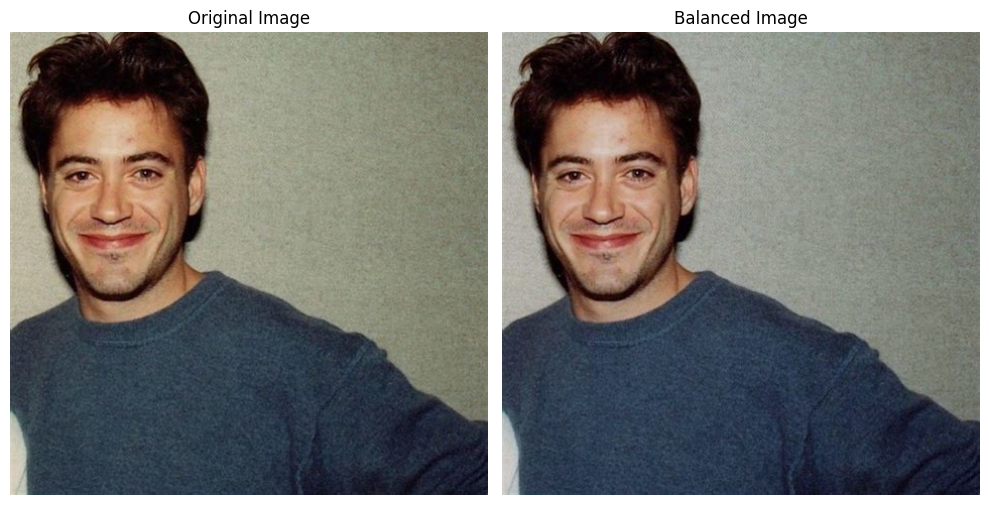

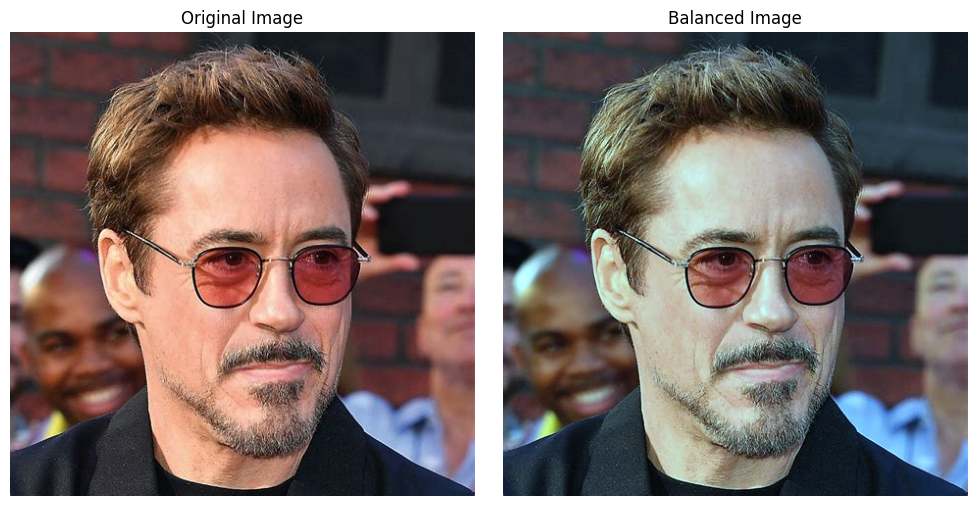

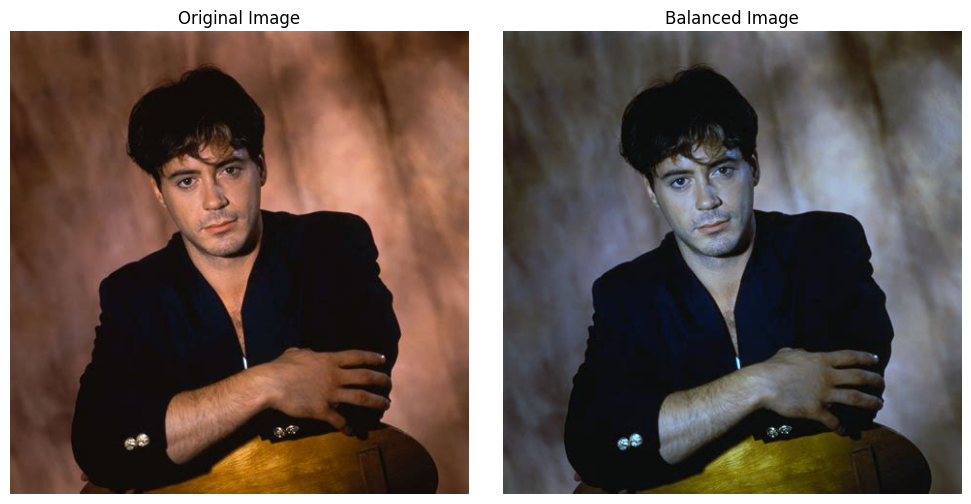

In [51]:
# Path to your dataset directory
dataset_dir ='/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Robert Downey Jr'

# List all image files in the directory
file_list = [file for file in os.listdir(dataset_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Choose 4 random images
selected_images = random.sample(file_list, 4)

# Process each randomly selected image
for img_file in selected_images:
    img_path = os.path.join(dataset_dir, img_file)
    image = cv2.imread(img_path)
    
    # Apply color balance adjustment
    balanced_image = adjust_color_balance(image)
    
    # Display the original and balanced images using Matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Original Image
    original_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[0].imshow(original_img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Balanced Image
    balanced_img = cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB)
    axs[1].imshow(balanced_img)
    axs[1].set_title('Balanced Image')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

Noise Reduction

In [112]:
# Function to apply noise reduction using bilateral filtering
def reduce_noise(image):
    # Convert image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    # Extract L channel
    l_channel = lab_image[:, :, 0]
    # Apply bilateral filter to the L channel for noise reduction
    denoised_l_channel = cv2.bilateralFilter(l_channel, d=9, sigmaColor=75, sigmaSpace=75)
    # Update L channel in the LAB image
    denoised_lab_image = lab_image.copy()
    denoised_lab_image[:, :, 0] = denoised_l_channel
    # Convert denoised LAB image back to BGR color space
    denoised_image = cv2.cvtColor(denoised_lab_image, cv2.COLOR_LAB2BGR)
    return denoised_image

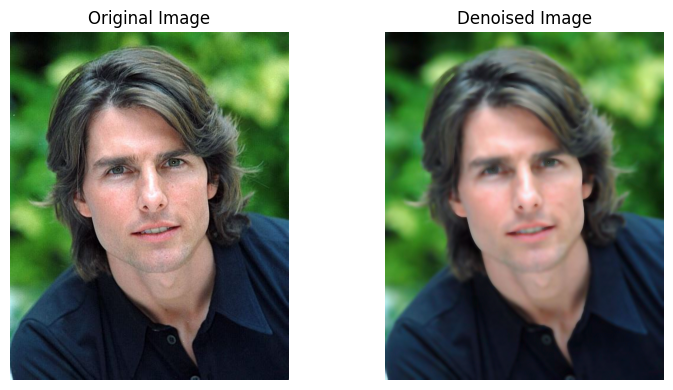

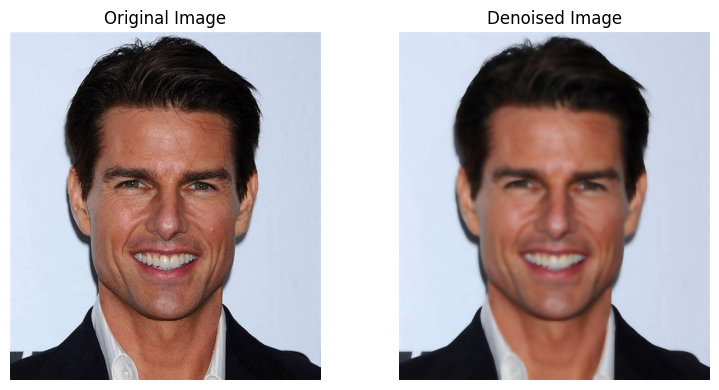

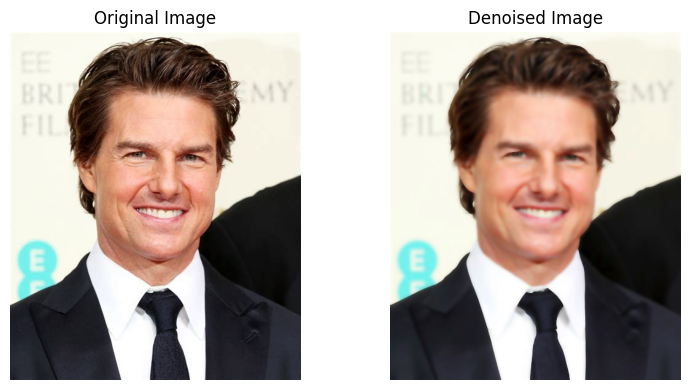

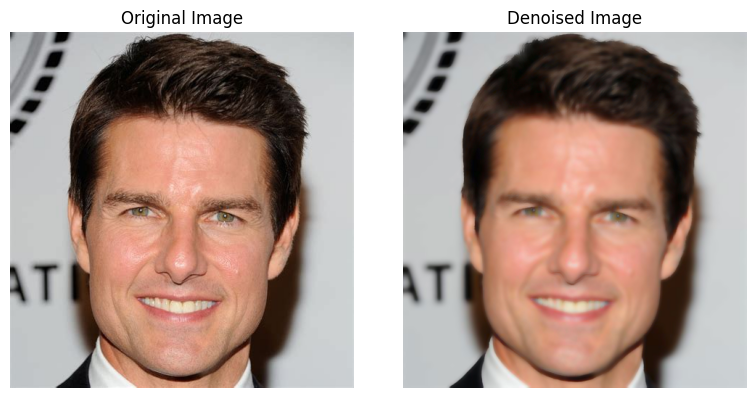

In [65]:
# Path to your dataset directory
dataset_dir = '/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Tom Cruise'  

# List all image files in the directory
file_list = [file for file in os.listdir(dataset_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Choose two random images
selected_images = random.sample(file_list, 4)

# Process each randomly selected image
for img_file in selected_images:
    img_path = os.path.join(dataset_dir, img_file)
    image = cv2.imread(img_path)
    
    # Apply noise reduction
    denoised_image = reduce_noise(image)
    
    # Display the original and denoised images using Matplotlib
    plt.figure(figsize=(8, 4))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    # Denoised Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    plt.title('Denoised Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Sharpening

In [67]:
def sharpen_image(image):
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    # Split the LAB image into channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    
    # Apply sharpening to the L channel using Laplacian filter
    l_channel_sharp = cv2.Laplacian(l_channel, cv2.CV_8U, ksize=3)
    
    # Merge the enhanced L channel with the original A and B channels
    enhanced_lab_image = cv2.merge((l_channel_sharp, a_channel, b_channel))
    
    # Convert LAB image back to BGR
    enhanced_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)
    
    return enhanced_image

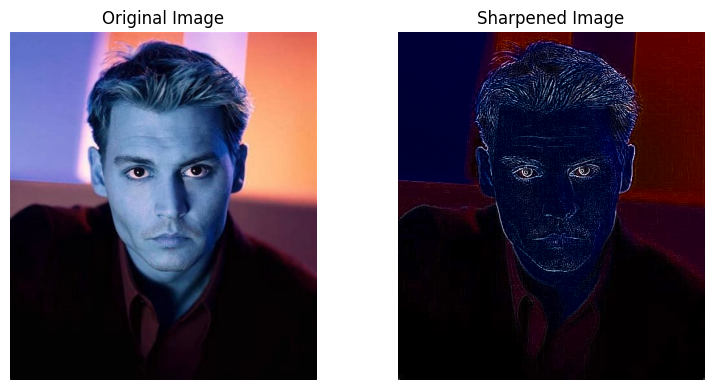

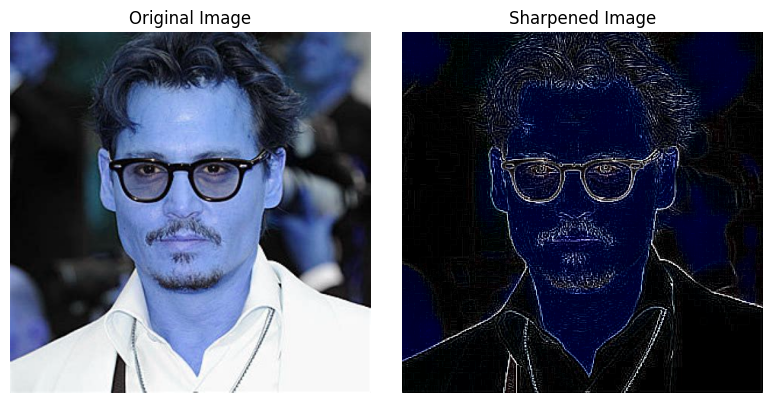

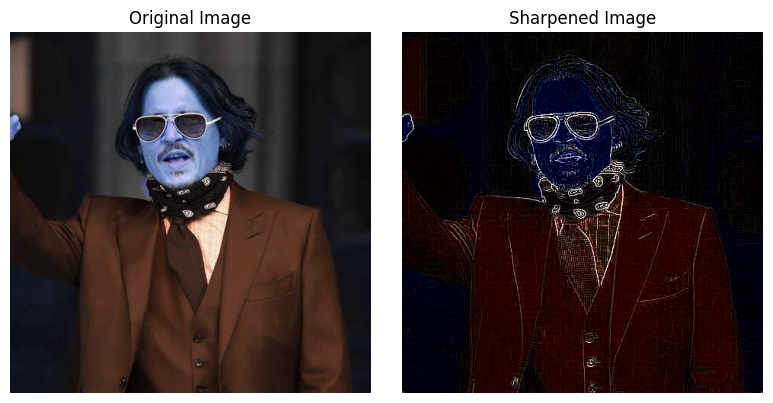

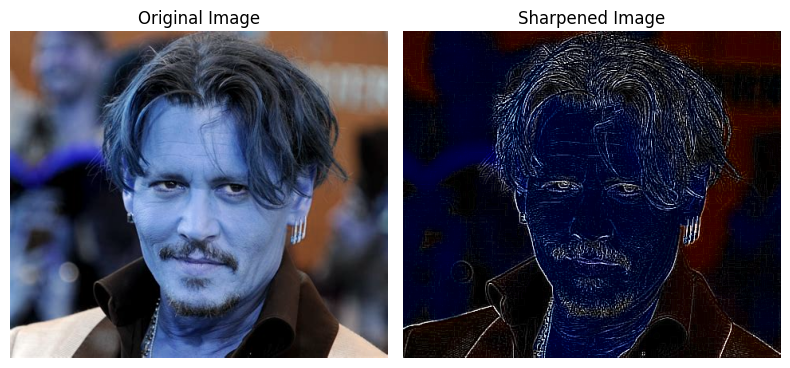

In [103]:
# Path to your dataset directory
dataset_dir = '/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Johnny Depp'
# List all files in the directory
file_list = os.listdir(dataset_dir)
# Choose two random images
selected_images = random.sample(file_list, 4)
for img_name in selected_images:
    # Read the image
    img_path = os.path.join(dataset_dir, img_name)
    image = cv2.imread(img_path)

    # Apply sharpening
    sharpened_image = sharpen_image(image)

    # Save the images using PIL
    original_img = Image.fromarray(image)
    sharpened_img = Image.fromarray(sharpened_image)

    original_img.save('original_image.jpg')
    sharpened_img.save('sharpened_image.jpg')

    # Display the original and sharpened images using Matplotlib
    plt.figure(figsize=(8, 4))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(original_img))  # Convert PIL Image to NumPy array for display
    plt.title('Original Image')
    plt.axis('off')

    # Sharpened Image
    plt.subplot(1, 2, 2)
    plt.imshow(np.array(sharpened_img))  # Convert PIL Image to NumPy array for display
    plt.title('Sharpened Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
